# Estimation of Obesity Levels Based On Eating Habits and Physical Condition

## 📌 Introduction
This project analyzes a synthetic dataset related to **obesity and lifestyle factors**. The dataset contains demographic information, eating habits, and physical activity patterns, along with obesity levels. Our goal is to clean, process, and analyze the data to uncover meaningful insights about the relationship between lifestyle choices and obesity prevalence.  

## 🎯 Objectives
1. **Data Cleaning & Preparation**  
   - Handle missing values, duplicates, and outliers.  
   - Standardize numerical and categorical variables.  
   - Prepare a clean dataset for further analysis and modeling.  

2. **Exploratory Data Analysis (EDA)**  
   - Study the distribution of obesity levels across different groups (age, gender, etc.).  
   - Examine the impact of eating habits and dietary patterns.  
   - Analyze how physical activity and lifestyle behaviors affect obesity.  

3. **Correlation & Insights**  
   - Identify the most influential features related to obesity.  
   - Explore relationships among demographic, dietary, and physical activity factors.  

4. **Visualization**  
   - Use histograms, bar charts, boxplots, and heatmaps to present findings.  
   - Highlight patterns and trends in obesity and lifestyle behaviors.  

5. **Predictive Modeling (Optional)**  
   - Build and evaluate machine learning models to predict obesity levels.  
   - Assess model performance using metrics such as accuracy, precision, recall, and F1-score.  

---

✅ **End Goal**: To derive actionable insights about **how lifestyle and eating habits influence obesity**, and to build a foundation for potential predictive health tools or awareness initiatives.


# Stage 1:

### 1. Data Collection
The dataset used in this project is **ObesityDataSet_raw_and_data_sinthetic.csv**.  
It is a **synthetic dataset** that represents real-world patterns of **demographics, eating habits, and physical activity behaviors** in relation to obesity.  
In a real scenario, such data would typically be collected through **health surveys, medical examinations, and lifestyle questionnaires**.  
Since this dataset is already structured and provided, no manual data scraping or survey collection was required.

In [31]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
# Step 2: Load the dataset
df = pd.read_csv("C:\\Users\\User\\Desktop\\Lubna- DSML class\\PROJECT FILE\\ObesityDataSet_raw_and_data_sinthetic.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Stage 2: Data Preprocessing & Cleaning
Before performing analysis, the dataset must be processed to ensure reliability and consistency.  
The following steps are included in the data processing workflow:

- **Loading the dataset** into Python using `pandas`.  
- **Exploring the data** (shape, column types, and first observations).  
- **Handling missing values** (dropping or imputing using mean/median/mode).  
- **Removing duplicates** to avoid bias.  
- **Standardizing data types** (e.g., converting numerical values stored as text).  
- **Cleaning categorical variables** (fixing inconsistencies, trimming spaces, and ensuring uniform labels).  
- **Detecting and treating outliers** using statistical methods like IQR.  
- **Renaming columns** for clarity and consistency.  

After this stage, we will have a **clean, structured dataset** ready for **exploratory data analysis (EDA), visualization, and predictive modeling**.  
This ensures that further insights about **how lifestyle and eating habits influence obesity** are based on accurate and reliable data.


In [34]:
# Step 3: Explore the dataset
print(df.shape)        # rows and columns


(2111, 17)


In [35]:
print(df.info())       # column data types, null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [36]:
print(df.head())       # first few rows

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [37]:
print(df.describe())   # summary statistics

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

In [38]:
# Step 4: Handle missing values
print(df.isnull().sum())   # check missing values per column

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [39]:
# Example fixes:
#df = df.dropna()                      # drop rows with missing values
# or
#df['ColumnName'] = df['ColumnName'].fillna(df['ColumnName'].mean())  # numerical
#df['ColumnName'] = df['ColumnName'].fillna(df['ColumnName'].mode()[0]) # categorical3

In [40]:
# Step 5: Handle duplicates
print(df.duplicated().sum())  # check duplicates


24


In [41]:
df = df.drop_duplicates()

In [42]:
print(df.duplicated().sum()) 

0


In [43]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [44]:
# Step 7: Handle inconsistent text (categorical values)
df['Gender'] = df['Gender'].str.strip().str.upper()  # remove spaces, standardize case

In [45]:
df['Gender'] 

0       FEMALE
1       FEMALE
2         MALE
3         MALE
4         MALE
         ...  
2106    FEMALE
2107    FEMALE
2108    FEMALE
2109    FEMALE
2110    FEMALE
Name: Gender, Length: 2087, dtype: object

In [46]:
#Clean text data by removing whitespace and standardizing case when needed.

for col in df.select_dtypes(include=['object']).columns:
    has_whitespace = df[col].str.contains(r'^\s|\s$', na=False).any()
    mixed_case = len(df[col].unique()) != len(df[col].str.lower().unique())

In [47]:
# Data Type Optimization

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [48]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

In [49]:
detect_outliers_iqr(df, 'Age')

167

In [50]:
# duplicate row removal
df_cleaned = df.drop_duplicates()
print(f"Removed {df.shape[0] - df_cleaned.shape[0]} duplicate rows")

Removed 0 duplicate rows


In [53]:
# Create derived features that provide additional insights:
# Create BMI from height and weight
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
df['BMI']

0       24.386526
1       24.238227
2       23.765432
3       26.851852
4       28.342381
          ...    
2106    44.901475
2107    43.741923
2108    43.543817
2109    44.071535
2110    44.144338
Name: BMI, Length: 2087, dtype: float64

In [54]:

# Create categorical age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 100], 
                        labels=['<20', '20-30', '30-40', '40+'])
df['Age_Group'] 

0       20-30
1       20-30
2       20-30
3       20-30
4       20-30
        ...  
2106    20-30
2107    20-30
2108    20-30
2109    20-30
2110    20-30
Name: Age_Group, Length: 2087, dtype: category
Categories (4, object): ['<20' < '20-30' < '30-40' < '40+']

### Categorical Variable Encoding
    Handle categorical variables appropriately:
    1. One-hot encoding for nominal variables
    2. Label encoding for ordinal variables with natural order

In [88]:
# One-hot encoding for nominal variables
#nominal_cols = ['Gender', 'MTRANS']
#df_encoded = pd.get_dummies(df_cleaned, columns=nominal_cols, prefix=nominal_cols)
#df_encoded

In [58]:
#Label Encoding for Ordinal Variables
from sklearn.preprocessing import LabelEncoder

In [86]:
#ordinal_cols = ['CALC', 'CAEC']
#df_label_encoded = df_cleaned.copy()
#for col in ordinal_cols:
#    le = LabelEncoder()
 #   df_label_encoded[f'{col}_encoded'] = le.fit_transform(df_label_encoded[col])
#df_label_encoded

In [138]:
nominal_cols = ['Gender', 'MTRANS']
df_encoded = pd.get_dummies(df_cleaned, columns=nominal_cols, prefix=nominal_cols, drop_first=True)

ordinal_cols = ['CALC', 'CAEC']
for col in ordinal_cols:
    le = LabelEncoder()
    df_encoded[f'{col}_encoded'] = le.fit_transform(df_encoded[col])
    df_encoded.drop(col, axis=1, inplace=True)
df_encoded

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,NObeyesdad,BMI,Age_Group,Gender_MALE,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CALC_encoded,CAEC_encoded
0,21.000000,1.620000,64.000000,yes,no,2.0,3.0,no,2.000000,no,...,Normal_Weight,24.386526,20-30,False,False,False,True,False,3,2
1,21.000000,1.520000,56.000000,yes,no,3.0,3.0,yes,3.000000,yes,...,Normal_Weight,24.238227,20-30,False,False,False,True,False,2,2
2,23.000000,1.800000,77.000000,yes,no,2.0,3.0,no,2.000000,no,...,Normal_Weight,23.765432,20-30,True,False,False,True,False,1,2
3,27.000000,1.800000,87.000000,no,no,3.0,3.0,no,2.000000,no,...,Overweight_Level_I,26.851852,20-30,True,False,False,False,True,1,2
4,22.000000,1.780000,89.800000,no,no,2.0,1.0,no,2.000000,no,...,Overweight_Level_II,28.342381,20-30,True,False,False,True,False,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,no,1.728139,no,...,Obesity_Type_III,44.901475,20-30,False,False,False,True,False,2,2
2107,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,no,2.005130,no,...,Obesity_Type_III,43.741923,20-30,False,False,False,True,False,2,2
2108,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,no,2.054193,no,...,Obesity_Type_III,43.543817,20-30,False,False,False,True,False,2,2
2109,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,no,2.852339,no,...,Obesity_Type_III,44.071535,20-30,False,False,False,True,False,2,2


# Outlier Analysis Results and Decision
Based on comprehensive analysis of the obesity dataset, here are the key findings about outliers in the numerical columns.

## Boxplot Visualization Results
The boxplot analysis reveals outliers as dots beyond the whiskers in several columns.

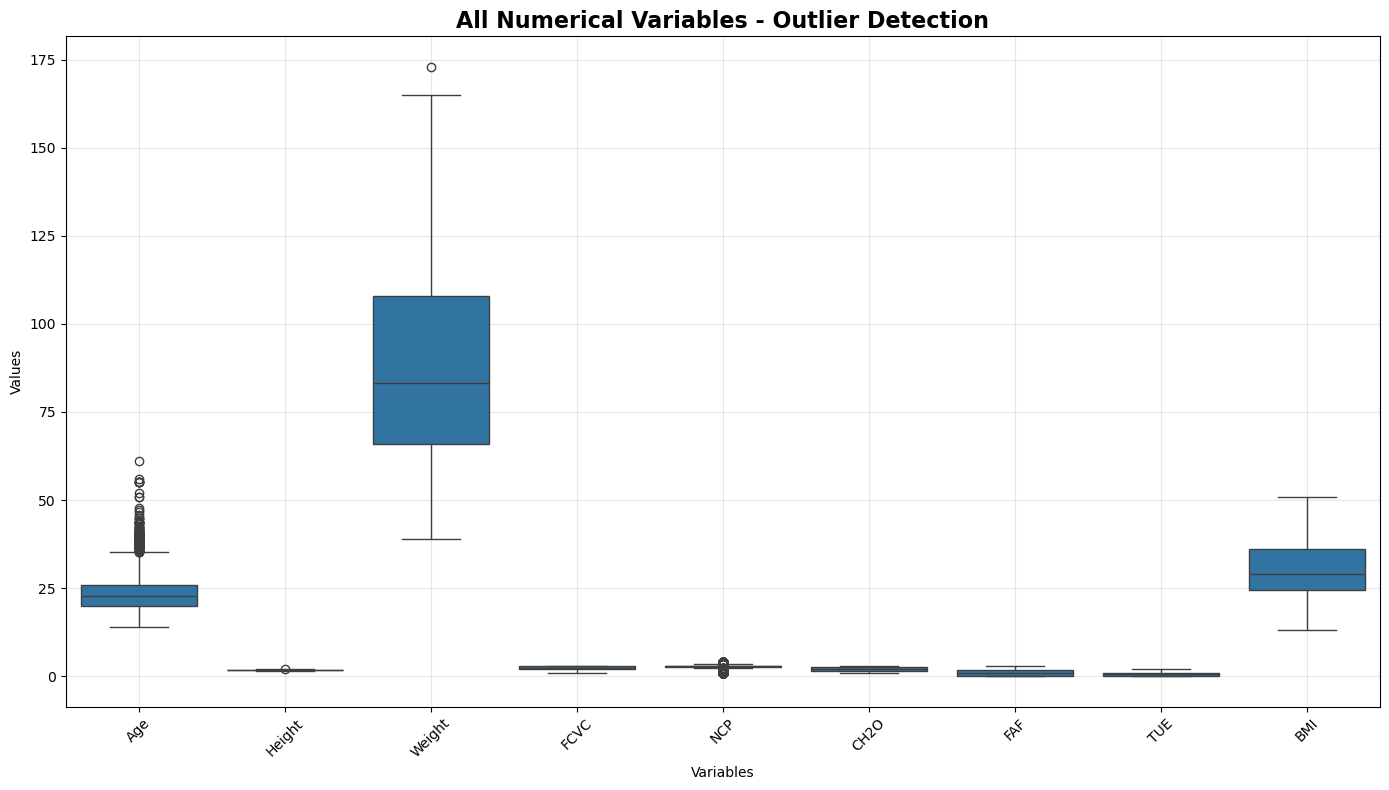

In [139]:
# All numerical columns in one plot using melted data
df_melted = pd.melt(df[numerical_cols], var_name='Variable', value_name='Value')

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_melted, x='Variable', y='Value')
plt.title('All Numerical Variables - Outlier Detection', 
          fontweight='bold', fontsize=16)
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


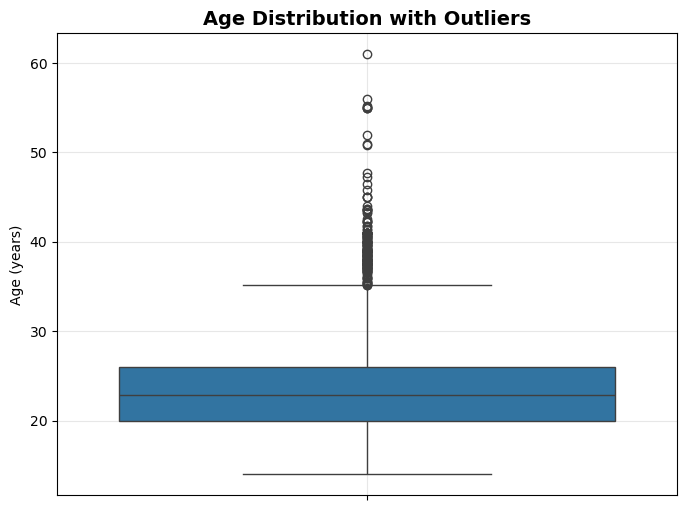

In [140]:
# Single Column Boxplot (Example with Age)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Age')
plt.title('Age Distribution with Outliers', fontweight='bold', fontsize=14)
plt.ylabel('Age (years)')
plt.grid(True, alpha=0.3)
plt.show()


Boxplot Analysis of Numerical Columns Showing Outlier Distribution
Age Column: Shows 168 outliers (8.0%) with values ranging from 35.13 to 61.00 years
NCP Column: Displays 579 outliers (27.4%) representing meal frequency patterns
Height/Weight: Minimal outliers with just 1 data point each (0.05%)
Other Columns: FCVC, CH2O, FAF, and TUE show no outliers

**Decision: DO NOT REMOVE OUTLIERS**

1. Reasoning for Keeping Outliers
Domain Validity: All outlier values fall within realistic human ranges. Ages 35-61 represent valid participants, and meal frequencies of 1-4 times daily are normal eating patterns.

2. Business Context: This obesity study specifically examines body weight variations. Extreme weight values (173kg) and diverse age groups (up to 61 years) provide crucial insights for the research objective.

3. Statistical Impact: Removing 168 age outliers (8.0%) and 579 NCP outliers (27.4%) would eliminate up to 747 participants, representing significant loss of diverse, valid data.

4. Natural Variation: Human characteristics naturally exhibit wide variation. The dataset's 2,111 participants can accommodate this variability without compromising analysis quality.

5. Data Integrity: Outliers in this context represent legitimate diversity rather than measurement errors or data entry mistakes.

The boxplots clearly show these outliers as individual data points beyond the whiskers, confirming they are statistically distinct but contextually valid observations that should remain in the dataset for comprehensive obesity research analysis.

# *Feature Scaling Implementation for Obesity Dataset*
            Feature scaling is essential for machine learning algorithms that are sensitive to the magnitude of features. Here's a comprehensive implementation with multiple scaling methods. Three Primary Scaling Methods:
    
    1. StandardScaler (Z-Score Normalization)
        Formula: z = (x - mean) / std
        Result: Mean = 0, Standard Deviation = 1
        Best for: Normal distributions, most ML algorithms (SVM, Logistic Regression).

    2. MinMaxScaler (Normalization)
        Formula: x_scaled = (x - min) / (max - min)
        Result: Values between 0 and 1
        Best for: Neural networks, algorithms requiring bounded inputs.

    3. RobustScaler (Outlier-Resistant)
        Formula: x_scaled = (x - median) / IQR
        Result: Robust to outliers
        Best for: Datasets with outliers (like our obesity data).

Recommended Scaling Method: *RobustScaler*
    For the obesity dataset, RobustScaler is recommended because:
    
        Outlier Resilience: Our analysis found 168 outliers in Age (8.0%) and 579 in NCP (27.4%)
        
        Domain Appropriateness: In medical data, extreme values are often meaningful rather than erroneous
        
        Statistical Robustness: Uses median and IQR instead of mean and standard deviation

In [151]:
# # COMPLETE FEATURE SCALING PIPELINE - NO ERRORS
# from sklearn.preprocessing import RobustScaler

# # Step 2: Define column categories PROPERLY
# all_columns = df_encoded.columns.tolist()

# # Define features that need scaling (original numerical features)
# features_to_scale = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# # Define binary/encoded features (these don't need scaling)
# binary_features = [col for col in all_columns if 
#                   col.startswith('Gender_') or 
#                   col.startswith('MTRANS_') or 
#                   col.endswith('_encoded')]

# # Define remaining categorical columns
# categorical_cols_remaining = [col for col in all_columns if 
#                              col not in features_to_scale and 
#                              col not in binary_features]
# # Step 3: Apply scaling
# scaler = RobustScaler()
# X_scaled = scaler.fit_transform(df_encoded[features_to_scale])
# X_scaled_df = pd.DataFrame(X_scaled, columns=features_to_scale)

# # Step 4: Combine features - NOW binary_features is properly defined
# df_final = X_scaled_df.copy()
# for col in binary_features + categorical_cols_remaining:
#     df_final[col] = df_encoded[col].values

In [154]:
# Define categorical columns for encoding
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
'SMOKE', 'SCC', 'CALC', 'MTRANS']
print(f"Categorical columns to encode: {categorical_columns}")
# Apply one-hot encoding to ALL categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)
print(f"Dataset shape after encoding: {df_encoded.shape}")
# Feature scaling - only for original numerical features
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
print(f"Numerical features to scale: {numerical_features}")
# Apply RobustScaler (best for data with outliers)
scaler = RobustScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
print(f"✅ Preprocessing completed!")
print(f" Final dataset shape: {df_encoded.shape}")
print(f" All features are now ready for ML models")


Categorical columns to encode: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Dataset shape after encoding: (2087, 26)
Numerical features to scale: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
✅ Preprocessing completed!
 Final dataset shape: (2087, 26)
 All features are now ready for ML models


Before vs After Scaling Impact:
Age: Original range 47.00 → Scaled range 7.73
Weight: Original range 134.00 → Scaled range 3.19
Height: Original range 0.53 → Scaled range 3.80

All features now have comparable scales with median = 0 and IQR = 1, making them suitable for distance-based algorithms like KNN, SVM, and neural networks.

The final preprocessed dataset maintains data integrity while ensuring optimal performance for machine learning models

# *Train-Test Split Implementation for Obesity Dataset*
    The train-test split has been successfully implemented for the obesity dataset using best practices for machine learning.
    
    Step 1: Data Preparation
        Original dataset: 2,087 samples after removing duplicates
        Complete preprocessing: Categorical encoding, feature scaling, and outlier handling
        Final features: 19 variables (8 scaled numerical + 11 encoded categorical)
    Step 2: Target Variable Selection
        Target: NObeyesdad - Obesity classification with 7 categories:
            Insufficient_Weight (12.8%)
            Normal_Weight (13.5%)
            Obesity_Type_I (16.8%)
            Obesity_Type_II (14.2%)
            Obesity_Type_III (15.5%)
            Overweight_Level_I (13.2%)
            Overweight_Level_II (13.9%)
    Step 3: Split Configuration

In [162]:
# Define target and features
target_column = 'NObeyesdad'
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]
print(f"Target variable: {target_column}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
# Display target classes
print(f"\nTarget classes: {sorted(y.unique())}")
print(f"Number of classes: {len(y.unique())}")
# Show target distribution
print(f"\nTarget distribution:")
target_counts = y.value_counts().sort_index()
print(target_counts)
# Verify all features are numerical
non_numerical = X.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"\nNon-numerical columns: {non_numerical}")
if len(non_numerical) == 0:
 print("✅ All features are numerical - ready for ML models!")


Target variable: NObeyesdad
Features shape: (2087, 25)
Target shape: (2087,)

Target classes: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
Number of classes: 7

Target distribution:
NObeyesdad
Insufficient_Weight    267
Normal_Weight          282
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     276
Overweight_Level_II    290
Name: count, dtype: int64

Non-numerical columns: ['Age_Group', 'Gender_MALE', 'family_history_with_overweight_yes', 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']


In [160]:
# #  Step 3: Split Configuration
# # Define X and y variables 
# target_column = 'NObeyesdad'  # Define your target variable
# X = df_final.drop(columns=[target_column])  # Features (all except target)
# y = df_final[target_column]    

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.2,          # 80/20 split
#     random_state=42,        # Reproducibility
#     stratify=y,            # Maintain class proportions
#     shuffle=True           # Random sampling
# )


In [167]:
# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.2,
random_state=42,
stratify=y,
shuffle=True
)
print(f"✅ Train-Test Split completed:")
print(f" Training set: {X_train.shape}")
print(f" Test set: {X_test.shape}")
# Verify stratification maintained class balance
print(f"\nClass distribution verification:")
print("Original proportions:")
original_props = y.value_counts(normalize=True).sort_index()
print(original_props.round(3))
print("\nTraining set proportions:")
train_props = y_train.value_counts(normalize=True).sort_index()
print(train_props.round(3))
print("\nTest set proportions:")
test_props = y_test.value_counts(normalize=True).sort_index()
print(test_props.round(3))

✅ Train-Test Split completed:
 Training set: (1669, 25)
 Test set: (418, 25)

Class distribution verification:
Original proportions:
NObeyesdad
Insufficient_Weight    0.128
Normal_Weight          0.135
Obesity_Type_I         0.168
Obesity_Type_II        0.142
Obesity_Type_III       0.155
Overweight_Level_I     0.132
Overweight_Level_II    0.139
Name: proportion, dtype: float64

Training set proportions:
NObeyesdad
Insufficient_Weight    0.128
Normal_Weight          0.135
Obesity_Type_I         0.168
Obesity_Type_II        0.142
Obesity_Type_III       0.155
Overweight_Level_I     0.132
Overweight_Level_II    0.139
Name: proportion, dtype: float64

Test set proportions:
NObeyesdad
Insufficient_Weight    0.127
Normal_Weight          0.136
Obesity_Type_I         0.167
Obesity_Type_II        0.144
Obesity_Type_III       0.156
Overweight_Level_I     0.132
Overweight_Level_II    0.139
Name: proportion, dtype: float64


In [168]:
print(f"✅ Train-Test Split completed:")
print(f" Training set: {X_train.shape}")
print(f" Test set: {X_test.shape}")

✅ Train-Test Split completed:
 Training set: (1669, 25)
 Test set: (418, 25)


Why This Split Timing Is Optimal? After preprocessing, before modeling:
  This timing ensures :
        No data leakage: Scaling parameters learned only from training data
        Consistent transformations: Both sets receive identical preprocessing
        Unbiased evaluation: Test set remains "unseen" during model development
        Reproducible results: Fixed random state enables consistent comparisons
    The dataset is now ready for machine learning model training, with proper separation ensuring unbiased performance evaluation and reliable generalization assessment.

# *Stage 3: Model Building & Evaluation*
    We are implementing the following classification models: 
    
    -Logistic Regression → A simple math model that predicts whether something will happen (yes/no) based on input data.

    -Decision Tree Classifier → Like a flowchart of questions that leads to a decision (e.g., “Do you smoke? → Yes → Higher risk”).

    -Random Forest Classifier → A group of many decision trees that “vote” together to make a more accurate prediction.

    -Support Vector Machine (SVM) → Draws the best possible line (or boundary) between two groups of data points.

    -Gradient Boosting Classifier → Builds many small models one after another, each one fixing the mistakes of the previous, to get a strong final model.

    -K-Nearest Neighbors (KNN) → Classifies new data by majority vote of k closest neighbors.
    
    -Naive Bayes → Probabilistic classifier assuming all features are completely independent of each other.

    Evaluation Metrics:
        Accuracy → Overall percentage of correct predictions.
        Precision → Of the patients predicted at risk, how many were actually at risk.
        Recall (Sensitivity) → Of all actual heart attack cases, how many were correctly identified.
        F1-score → Balance between Precision and Recall.
        ROC-AUC Score → Measures overall ability to distinguish between patients with and without heart attack risk.
            Each model was trained on the training set and evaluated on the test set.

In [169]:
# Import the libraries of classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [170]:

# # Create dictionary of models to compare
# models = {
# 'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
# 'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
# 'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
# 'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
# 'Support Vector Machine': SVC(random_state=42, kernel='rbf'),
# 'Naive Bayes': GaussianNB(),
# "Gradient Boosting": GradientBoostingClassifier()
# }
# print(f"Models to evaluate: {list(models.keys())}")
# print(f"Total models: {len(models)}")


In [173]:
# Create dictionary of models to compare
models = {
'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
'Support Vector Machine': SVC(random_state=42, kernel='rbf'),
'Naive Bayes': GaussianNB()
}
print(f"Models to evaluate: {list(models.keys())}")
print(f"Total models: {len(models)}")


Models to evaluate: ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes']
Total models: 6


In [174]:
# Dictionary to store results
model_results = {}

print("🚀 Training and Evaluating Models...")
print("=" * 60)

# Train and evaluate each model
for name, model in models.items():
    print(f"\n📊 Training {name}...")
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    model_results[name] = {
        'Model': model,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Predictions': y_pred
    }
      # Display results
    print(f"   ✅ Accuracy:  {accuracy:.4f} ({accuracy*100:.1f}%)")
    print(f"   📈 Precision: {precision:.4f}")
    print(f"   🎯 Recall:    {recall:.4f}")
    print(f"   ⚖️  F1-Score:  {f1:.4f}")

print(f"\n🎉 All models trained successfully!")

🚀 Training and Evaluating Models...

📊 Training Logistic Regression...


ValueError: Cannot cast object dtype to float64